# Group 15-Air Pollution dataset

# 1. Data Collection

# Importing libraries

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
#Importing .csv file
df= pd.read_csv('Air_Pollution_data.csv')
df1=df

In [4]:
df.head()

,City,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,3.14,209,Poor
1,Ahmedabad,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,4.81,328,Very Poor
2,Ahmedabad,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,7.67,514,Severe
3,Ahmedabad,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,25.87,782,Severe
4,Ahmedabad,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,35.61,914,Severe


## The data set is Collected and read to Python.

# 2. Preprocessing

# 2.1 Encoding

# 2.1.1 Ordinal Encoding

In [5]:
df['AQI_Bucket'].value_counts()

Satisfactory    637
Moderate        612
Severe          583
Poor            314
Very Poor       258
Good            148
Name: AQI_Bucket, dtype: int64

In [6]:
scale_mapper = {'Good':6,'Satisfactory':5,'Moderate':4,'Poor':3,'Very Poor':2,'Severe':1}
df['AQI_Bucket'] = df['AQI_Bucket'].replace(scale_mapper)

In [7]:
df.head()

,City,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,3.14,209,3
1,Ahmedabad,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,4.81,328,2
2,Ahmedabad,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,7.67,514,1
3,Ahmedabad,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,25.87,782,1
4,Ahmedabad,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,35.61,914,1


# Insight
 ## we do ordinal encording so as to get a finite set of discrete values with a ranked ordering between values.

# 2.1.2 One Hot Encoding

In [8]:
df.City.nunique()

3

In [9]:
df=pd.get_dummies(df)

In [10]:
df.head()

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,City_Ahmedabad,City_Amaravati,City_Amritsar
0,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,3.14,209,3,1,0,0
1,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,4.81,328,2,1,0,0
2,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,7.67,514,1,1,0,0
3,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,25.87,782,1,1,0,0
4,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,35.61,914,1,1,0,0


# Insight
## For categorical variables where no ordinal relationship exists we use One hot encoding and one new binary variable is added for each unique integer value in the variable.

# 2.2 Missing value handling

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552 entries, 0 to 2551
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PM2.5           2551 non-null   float64
 1   NO              2552 non-null   float64
 2   NO2             2552 non-null   float64
 3   NOx             2551 non-null   float64
 4   CO              2550 non-null   float64
 5   SO2             2532 non-null   float64
 6   O3              2526 non-null   float64
 7   Benzene         2551 non-null   float64
 8   Toluene         2551 non-null   float64
 9   Xylene          2465 non-null   float64
 10  AQI             2552 non-null   int64  
 11  AQI_Bucket      2552 non-null   int64  
 12  City_Ahmedabad  2552 non-null   uint8  
 13  City_Amaravati  2552 non-null   uint8  
 14  City_Amritsar   2552 non-null   uint8  
dtypes: float64(10), int64(2), uint8(3)
memory usage: 246.9 KB


In [12]:
df.isna().sum()

PM2.5              1
NO                 0
NO2                0
NOx                1
CO                 2
SO2               20
O3                26
Benzene            1
Toluene            1
Xylene            87
AQI                0
AQI_Bucket         0
City_Ahmedabad     0
City_Amaravati     0
City_Amritsar      0
dtype: int64

In [13]:
df.shape

(2552, 15)

In [14]:
df.describe()

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,City_Ahmedabad,City_Amaravati,City_Amritsar
count,2551.000000,2552.000000,2552.000000,2551.000000,2550.000000,2532.000000,2526.000000,2551.000000,2551.000000,2465.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000
mean,58.511360,17.002457,40.264538,36.598432,10.992220,33.314439,35.382003,4.015512,16.518408,4.411241,277.777429,3.355016,0.474138,0.287226,0.238636
std,38.646186,18.507823,40.717135,30.633551,18.435665,36.156384,20.577394,6.557780,25.467983,7.744910,282.976905,1.627907,0.499429,0.452556,0.426334
min,3.040000,0.060000,0.080000,0.860000,0.000000,0.520000,0.380000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000,0.000000,0.000000
25%,31.245000,4.797500,11.997500,16.485000,0.592500,9.827500,21.012500,0.300000,1.190000,0.190000,88.000000,2.000000,0.000000,0.000000,0.000000
50%,49.040000,11.290000,22.800000,26.990000,1.170000,16.595000,32.035000,2.080000,4.100000,1.980000,174.000000,4.000000,0.000000,0.000000,0.000000
75%,77.945000,21.477500,56.522500,48.750000,15.162500,45.365000,45.687500,4.655000,29.525000,6.940000,361.250000,5.000000,1.000000,1.000000,0.000000
max,381.690000,175.810000,277.310000,246.030000,175.810000,186.080000,162.430000,115.140000,371.650000,125.180000,2049.000000,6.000000,1.000000,1.000000,1.000000


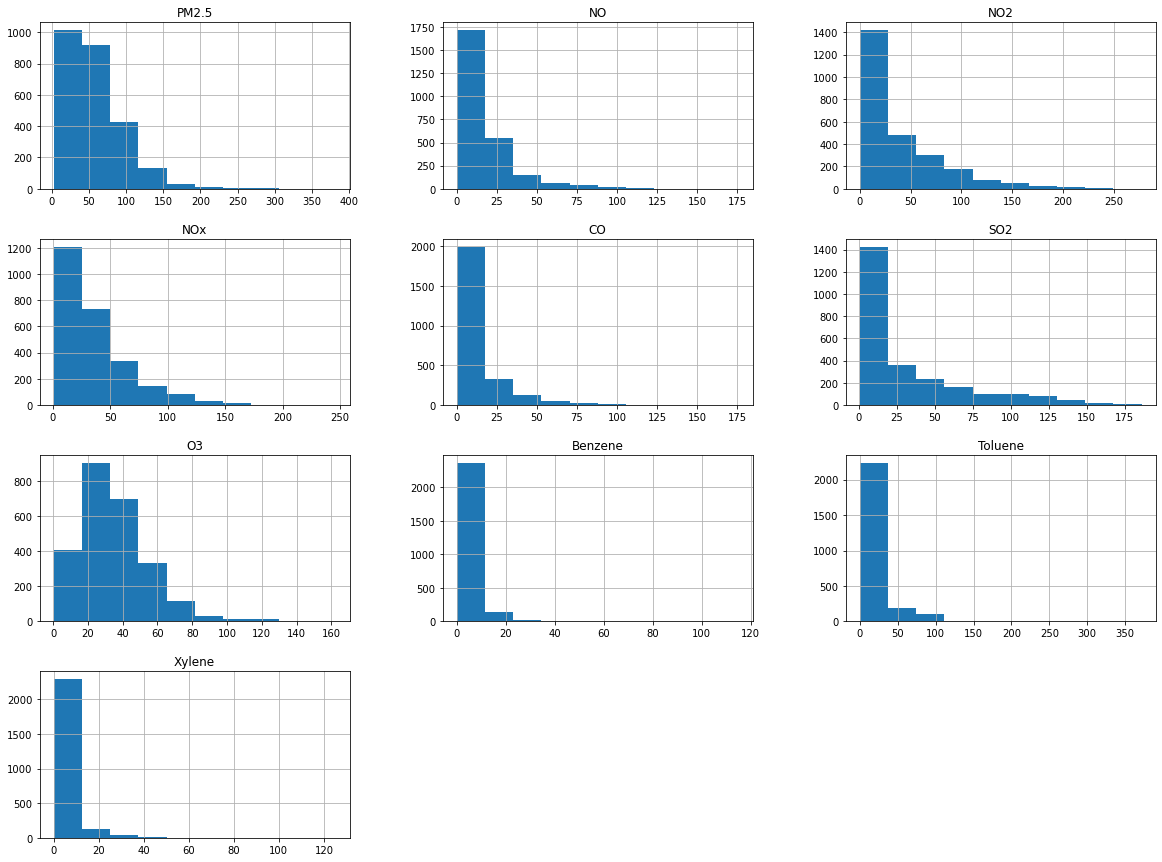

In [15]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

# Insight 
## All the data following right skewed distribution.

In [16]:
df.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
       'Xylene', 'AQI', 'AQI_Bucket', 'City_Ahmedabad', 'City_Amaravati',
       'City_Amritsar'],
      dtype='object')

In [17]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [18]:
df.isna().sum()

PM2.5             0
NO                0
NO2               0
NOx               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene            0
AQI               0
AQI_Bucket        0
City_Ahmedabad    0
City_Amaravati    0
City_Amritsar     0
dtype: int64

# Insight
## The missing values are handled using KNNImputer

# 2.3 Outlier detection and handling

{'whiskers': [<matplotlib.lines.Line2D at 0x14e9b7c6040>,
 'caps': [<matplotlib.lines.Line2D at 0x14e9b7e5430>,
 'boxes': [<matplotlib.lines.Line2D at 0x14e9b7c6f40>,
 'medians': [<matplotlib.lines.Line2D at 0x14e9b7e5f70>,
 'fliers': [<matplotlib.lines.Line2D at 0x14e9b7e50d0>,
 'means': []}

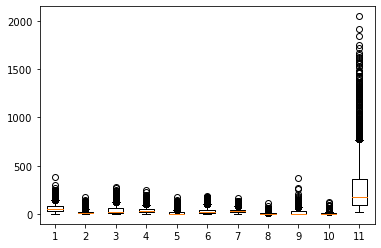

In [19]:
plt.boxplot(df[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI']])

# Insight
## outlier removal not possible because of heavy data loss.

# 2.4 Feature engineering

In [20]:
df.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
       'Xylene', 'AQI', 'AQI_Bucket', 'City_Ahmedabad', 'City_Amaravati',
       'City_Amritsar'],
      dtype='object')

In [21]:
df['mean_nox']=df[['NO', 'NO2', 'NOx']].mean(axis=1)
df['sum_nox']=df[['NO', 'NO2', 'NOx']].sum(axis=1)
df['skew_nox']=df[['NO', 'NO2', 'NOx']].skew(axis=1)

# Insight
## 3 new features are added mean_nox, sum_nox and skew_nox.

# 2.5 Feature reduction

<AxesSubplot:>

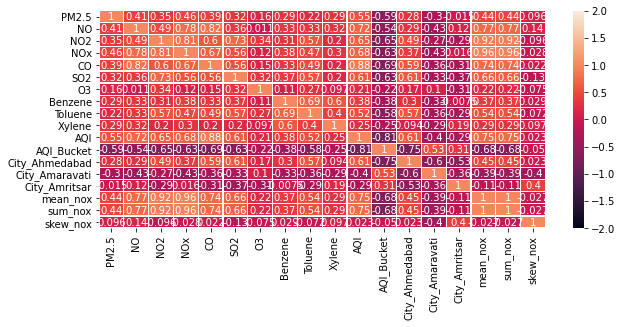

In [22]:
corrvalue = df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrvalue,vmin=-2,vmax=2,annot=True,linewidth=0.2)

# Insight
## mean_nox and sum_nox has high correlation with NOx hence we remove them

In [23]:
df.drop(['mean_nox','sum_nox'],axis=1,inplace=True)

In [24]:
df.head()

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,City_Ahmedabad,City_Amaravati,City_Amritsar,skew_nox
0,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,3.14,209.0,3.0,1.0,0.0,0.0,-1.494086
1,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,4.81,328.0,2.0,1.0,0.0,0.0,-0.266421
2,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,7.67,514.0,1.0,1.0,0.0,0.0,1.120691
3,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,25.87,782.0,1.0,1.0,0.0,0.0,1.725498
4,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,35.61,914.0,1.0,1.0,0.0,0.0,-0.080786


# Splitting the data

In [25]:
df.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
       'Xylene', 'AQI', 'AQI_Bucket', 'City_Ahmedabad', 'City_Amaravati',
       'City_Amritsar', 'skew_nox'],
      dtype='object')

In [26]:
x=df.drop(['AQI_Bucket'],axis=1)
y=df['AQI_Bucket']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 2.6 Standardisation/Normalization

# 2.6.1 Scaling using Standard Scaler

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

# 3. Exploratory Data Analysis (EDA)

# 3.1 Univariate analysis

Text(0, 0.5, 'AQI rating count')

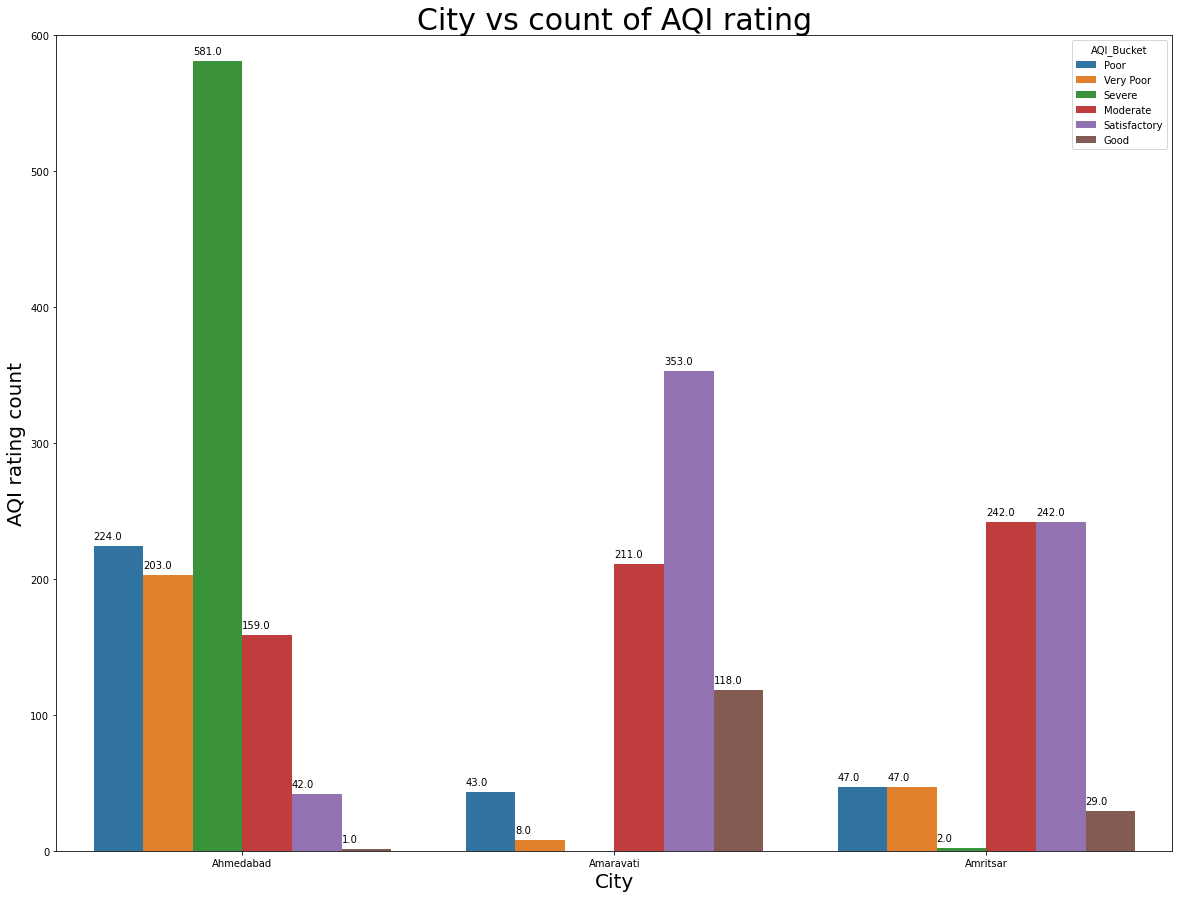

In [89]:
plt.figure(figsize=(20,15))
plt.ylim(0,600)
plt.xlabel("City",fontsize=20)
graph=sns.countplot(x='City',data=df1,hue="AQI_Bucket")
plt.title('City vs count of AQI rating',size=30)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+5))
plt.ylabel("AQI rating count",fontsize=20)

# Insight
## Amarvati is found to show more entries of good and satisfactory AQI  where as Ahmeadabad is is found to have more number of very severe Air Quality. Hence we can say that Amarvati has cleaner air than the other two places. 

# 3.2 Bivariate analysis

Text(0.5, 1.0, 'NOx vs NO2')

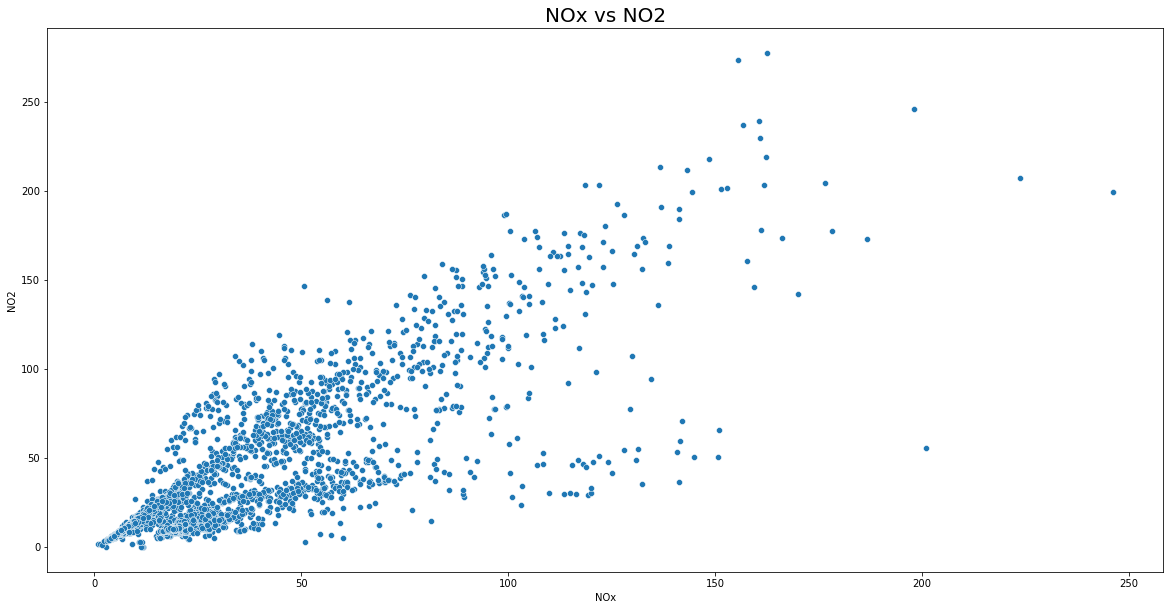

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='NOx',y='NO2',data=df1)
plt.title('NOx vs NO2',size=20)

# Insight
## NO2 and NOx is found to show some close relation in the lower range while as the value increase they seem to spread out.

<AxesSubplot:>

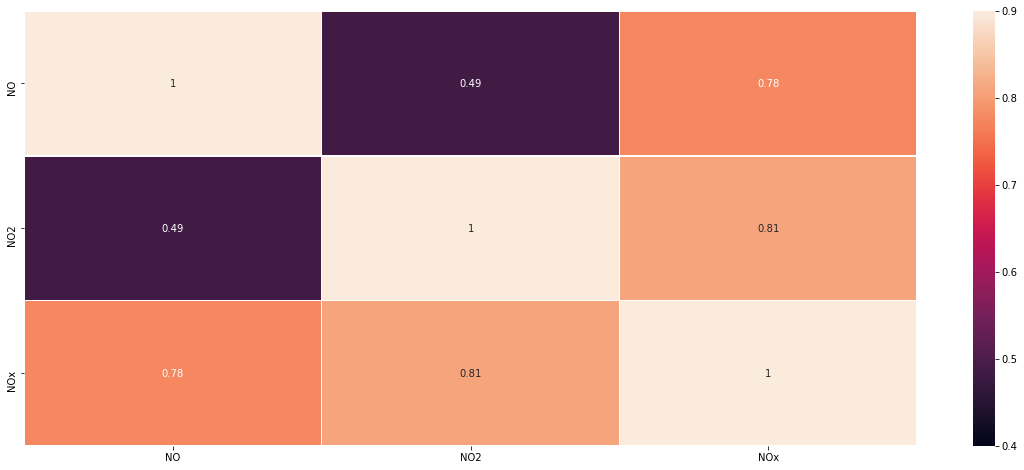

In [30]:
corrmatrix=df1[['NO','NO2','NOx']].corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=.4,vmax=.9,annot=True,linewidth=0.3)

# Insight
## NO and NO2 are found to show good correlation with NOx (.77 and .79 Respectively)

# 4. Modeling


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score

# 4.1. Building the model using RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [33]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='weighted'))
print("Recall is:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pred,average='weighted'))

Accuracy is: 0.9823874755381604
Precision is: 0.9826226752600273
Recall is: 0.9823874755381604
F1 Score is: 0.9823218952979003


In [34]:
confusion_matrix(y_test,y_pred)

array([[118,   0,   0,   0,   0,   0],
       [  1,  55,   1,   0,   0,   0],
       [  0,   3,  53,   1,   0,   0],
       [  0,   1,   0, 117,   0,   0],
       [  0,   0,   0,   0, 124,   0],
       [  0,   0,   0,   0,   2,  35]], dtype=int64)

# 4.2 Building the model using Gradient Boosting

# 4.2.1 Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_predict=gb.predict(x_test)

In [36]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average='weighted'))
print("Recall is:",recall_score(y_test,y_predict,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predict,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [37]:
confusion_matrix(y_test,y_predict)

array([[118,   0,   0,   0,   0,   0],
       [  0,  57,   0,   0,   0,   0],
       [  0,   0,  57,   0,   0,   0],
       [  0,   0,   0, 118,   0,   0],
       [  0,   0,   0,   0, 124,   0],
       [  0,   0,   0,   0,   0,  37]], dtype=int64)

# 4.2.2 Extreme Gradient Boosting

In [38]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_predd=xgb.predict(x_test)

C:\Users\NJ\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
print("Accuracy is:",accuracy_score(y_test,y_predd))
print("Precision is:",precision_score(y_test,y_predd,average='weighted'))
print("Recall is:",recall_score(y_test,y_predd,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predd,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [40]:
confusion_matrix(y_test,y_predd)

array([[118,   0,   0,   0,   0,   0],
       [  0,  57,   0,   0,   0,   0],
       [  0,   0,  57,   0,   0,   0],
       [  0,   0,   0, 118,   0,   0],
       [  0,   0,   0,   0, 124,   0],
       [  0,   0,   0,   0,   0,  37]], dtype=int64)

# 4.3 Building the model using Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(x_train,y_train)
y_preddd=log_r.predict(x_test)

C:\Users\NJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
print("Accuracy is:",accuracy_score(y_test,y_preddd))
print("Precision is:",precision_score(y_test,y_preddd,average='weighted'))
print("Recall is:",recall_score(y_test,y_preddd,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_preddd,average='weighted'))

Accuracy is: 0.8043052837573386
Precision is: 0.8024165137976411
Recall is: 0.8043052837573386
F1 Score is: 0.7984574959889374


In [43]:
confusion_matrix(y_test,y_preddd)

array([[114,   4,   0,   0,   0,   0],
       [  3,  39,  15,   0,   0,   0],
       [  0,   7,  45,   5,   0,   0],
       [  0,   1,   7,  99,  11,   0],
       [  0,   0,   0,  15, 102,   7],
       [  0,   0,   0,   0,  25,  12]], dtype=int64)

# 4.4 Building the model using KNN Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train,y_train)
    y_predic=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predic)
    acc_values.append(acc)

In [45]:
acc_values

[0.7455968688845401,
 0.7299412915851272,
 0.7553816046966731,
 0.7338551859099804,
 0.7397260273972602,
 0.7318982387475538,
 0.726027397260274,
 0.7221135029354208,
 0.7221135029354208,
 0.7221135029354208,
 0.7103718199608611,
 0.7084148727984344]

Text(0, 0.5, 'accuracy')

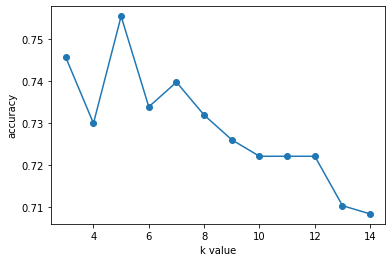

In [46]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [96]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train,y_train)
y_predic=classifier.predict(x_test)

In [97]:
print("Accuracy is:",accuracy_score(y_test,y_predic))
print("Precision is:",precision_score(y_test,y_predic,average='weighted'))
print("Recall is:",recall_score(y_test,y_predic,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predic,average='weighted'))

Accuracy is: 0.7553816046966731
Precision is: 0.7520683174228086
Recall is: 0.7553816046966731
F1 Score is: 0.7524256953575595


In [49]:
confusion_matrix(y_test,y_predic)

array([[109,   7,   2,   0,   0,   0],
       [ 17,  26,  13,   1,   0,   0],
       [  3,  11,  36,   7,   0,   0],
       [  3,   2,  10,  89,  14,   0],
       [  0,   0,   1,  20,  96,   7],
       [  0,   0,   0,   0,  19,  18]], dtype=int64)

# 4.5 Building the model using Decision Tree Model

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pr=dt.predict(x_test)

In [51]:
print("Accuracy is:",accuracy_score(y_test,y_pr))
print("Precision is:",precision_score(y_test,y_pr,average='weighted'))
print("Recall is:",recall_score(y_test,y_pr,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pr,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [52]:
confusion_matrix(y_test,y_pr)

array([[118,   0,   0,   0,   0,   0],
       [  0,  57,   0,   0,   0,   0],
       [  0,   0,  57,   0,   0,   0],
       [  0,   0,   0, 118,   0,   0],
       [  0,   0,   0,   0, 124,   0],
       [  0,   0,   0,   0,   0,  37]], dtype=int64)

# 4.6 Building the model using SVM Model

In [53]:
from sklearn.svm import SVC

# 4.6.1 Linear SVM

In [54]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pre=svm_linear.predict(x_test)

In [55]:
print("Accuracy is:",accuracy_score(y_test,y_pre))
print("Precision is:",precision_score(y_test,y_pre,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre,average='weighted'))

Accuracy is: 0.9021526418786693
Precision is: 0.9043306125069396
Recall is: 0.9021526418786693
F1 Score is: 0.9005066030026683


In [56]:
confusion_matrix(y_test,y_pre)

array([[114,   4,   0,   0,   0,   0],
       [  2,  52,   3,   0,   0,   0],
       [  0,   5,  51,   1,   0,   0],
       [  0,   0,   2, 107,   9,   0],
       [  0,   0,   0,   3, 116,   5],
       [  0,   0,   0,   0,  16,  21]], dtype=int64)

# 4.6.2 Polynomial SVM

In [57]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pre1=svm_poly.predict(x_test)

In [58]:
print("Accuracy is:",accuracy_score(y_test,y_pre1))
print("Precision is:",precision_score(y_test,y_pre1,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre1,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre1,average='weighted'))

Accuracy is: 0.7045009784735812
Precision is: 0.6695747073723816
Recall is: 0.7045009784735812
F1 Score is: 0.679639980745755


C:\Users\NJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
confusion_matrix(y_test,y_pre1)

array([[106,   4,   8,   0,   0,   0],
       [  8,  27,  22,   0,   0,   0],
       [  0,   5,  38,  14,   0,   0],
       [  1,   1,  13,  86,  17,   0],
       [  0,   0,   0,  21, 103,   0],
       [  0,   0,   0,   1,  36,   0]], dtype=int64)

# 4.6.3 Radial SVM

In [60]:
svm_rad=SVC(kernel='rbf')
svm_rad.fit(x_train,y_train)
y_pre2=svm_rad.predict(x_test)

In [61]:
print("Accuracy is:",accuracy_score(y_test,y_pre2))
print("Precision is:",precision_score(y_test,y_pre2,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre2,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre2,average='weighted'))

Accuracy is: 0.7416829745596869
Precision is: 0.6906964930555762
Recall is: 0.7416829745596869
F1 Score is: 0.7131883886805034


C:\Users\NJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
confusion_matrix(y_test,y_pre2)

array([[112,   6,   0,   0,   0,   0],
       [ 11,  36,  10,   0,   0,   0],
       [  0,  11,  39,   7,   0,   0],
       [  4,   0,  13,  87,  14,   0],
       [  0,   0,   0,  19, 105,   0],
       [  0,   0,   0,   0,  37,   0]], dtype=int64)

# Insight

### The Gradient boosting ,Extreme gradient boosting and Decision tree model has the highest vaules.
    Accuracy is: 1
    Precision is: 1
    Recall is: 1
    F1 Score is: 1

# 5. Model FineTuning

# 5.1 Random forest classifier hyperparameter tuning

In [82]:
rf_hyp=RandomForestClassifier(random_state=42,criterion='entropy')

In [83]:
rf_hyp.fit(x_train,y_train)
y_pred=rf_hyp.predict(x_test)

In [84]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='weighted'))
print("Recall is:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pred,average='weighted'))

Accuracy is: 0.9863013698630136
Precision is: 0.9863252233230361
Recall is: 0.9863013698630136
F1 Score is: 0.9862010319878486


In [87]:
print('The old model had less accuracy:\nAccuracy is: 0.9823874755381604\nPrecision is: 0.9826226752600273\nRecall is: 0.9823874755381604\nF1 Score is: 0.9823218952979003')

The old model had less accuracy:
Accuracy is: 0.9823874755381604
Precision is: 0.9826226752600273
Recall is: 0.9823874755381604
F1 Score is: 0.9823218952979003


# Insight
## Hence Random forest classifier model is fine tuned using hyper parameters and accuracy is improved.
## Since the accuracy values are already 1 for 3 of the models. There is no requirement for fine tuning using hyperparameters for the Gradient boosting ,Extreme gradient boosting and Decision tree models